図14.4のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#位相遅れコントローラのパラメータを与える

omega1 = 1 #ω_1=1
omega2 = 0.1 #ω_2=.01
omega20 = 0 #ω_20=0

#位相遅れコントローラの分子・分母多項式を与える
numc = [1, omega1] #分子多項式
denc1 = [1,omega2] #ω_2=0.1の場合の分母多項式
denc2 = [1, omega20] #ω_{2}=0の場合の分母多項式

#位相遅れコントローラの伝達関数表現を与える
sys1 = signal.lti(numc, denc1) #ω_{2}=0.1の場合のの場合の伝達関数（signal.ltiの場合）
sys2 = signal.lti(numc, denc2) #ω_{2}=0の場合のの場合の伝達関数（signal.ltiの場合）

In [3]:
#角周波数の範囲を指定
w = np.logspace(-3, 3, 1000) #対数的に等間隔なベクトルの生成(10^{-3}から10^{3}で1000点)

#ゲインと位相の計算
wC1, gainC1, phaseC1 = signal.bode(sys1, w) #ゲインと位相
wC2, gainC2, phaseC2 = signal.bode(sys2, w) #ゲインと位相

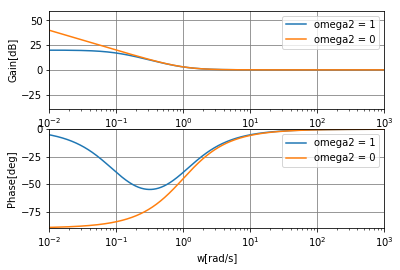

In [4]:
# ゲイン線図のプロット
plt.subplot(2, 1, 1) #複数の図を並べるためのコマンド．2行1列の1行目という意味
plt.semilogx(wC1, gainC1, label="omega2 = 1") #ゲイン線図をプロット
plt.semilogx(wC2, gainC2, label="omega2 = 0") #ゲイン線図をプロット
plt.xlim([0.01,1000]) #横軸（角周波数）の範囲の指定
plt.ylim([-40,60]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.legend() #凡例の表示

# 位相線図のプロット
plt.subplot(2, 1, 2) #複数の図を並べるためのコマンド．2行1列の2行目という意味
plt.semilogx(wC1, phaseC1, label="omega2 = 1") #位相線図をプロット
plt.semilogx(wC2, phaseC2, label="omega2 = 0") #位相線図をプロット
plt.xlim([0.01,1000]) #横軸（角周波数）の範囲の指定
plt.ylim([-90,0]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示
plt.legend() #凡例の表示

plt.show() #グラフの表示